In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [11]:
url='https://www.opinet.co.kr/searRgSelect.do'
driver=webdriver.Chrome()
driver.get(url)

## 리스트 가져오기

In [12]:
# 팝업창 싼 주유소 찾기 클릭
driver.find_element(By.CSS_SELECTOR, '.ic_m1').click()

In [13]:
# 서울 시/도 리스트를 찾기
metro=driver.find_element(By.XPATH,"//*[@id='SIDO_NM0']")
metro.send_keys('서울')

In [5]:
# 서울 자치구 리스트 가져오기
sigungu=driver.find_element(By.XPATH,"//*[@id='SIGUNGU_NM0']")
gu_list=sigungu.find_elements(By.CSS_SELECTOR, 'option')
for gu in gu_list:
    print(gu.text)

시/군/구
강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


In [6]:
gu_name=[gu.text for gu in gu_list]
gu_name

['시/군/구',
 '강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [7]:
del gu_name[0]
gu_name

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [8]:
# 엑셀 저장
driver.find_element(By.XPATH,"//*[@id='glopopd_excel']/span").click()

In [14]:
# 25개 자치구에 대한 주유소 정보 저장
for gu in gu_name:
    sigungu=driver.find_element(By.XPATH,"//*[@id='SIGUNGU_NM0']")
    time.sleep(2)
    sigungu.send_keys(gu)
    time.sleep(2)
    driver.find_element(By.XPATH,"//*[@id='glopopd_excel']/span").click()
    time.sleep(2)

In [16]:
driver.close()

# 구별 휘발유 가격 데이터 정리
* 다운받은 파일 합치기

In [15]:
from glob import glob
glob(r'C:\Users\songh\Downloads\지역*.xls') # '지역'이 포함된 어떤 글자든 불러오기
# 다운 받아진 파일 경로 복붙!
# r: 안에 있는 이스케이프문자(\t) 모두 무시

['C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (1).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (10).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (11).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (12).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (13).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (14).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (15).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (16).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (17).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (18).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (19).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (2).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (20).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (21).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (22).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (23).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (24).xls',
 'C:\\Users\\songh\\Downloads\\지역_위치별(주유소) (3).xls',
 'C:\\Users\\songh\\Downloads\\

In [18]:
file=glob(r'C:\Users\songh\Downloads\지역*.xls')[0]
df=pd.read_excel(file, header=2)
df.tail()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
9,서울특별시,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),SK에너지,02-442-7801,Y,-,1665,1839,1800
10,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,-,1678,1838,-
11,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1695,1875,1693
12,서울특별시,천호현대주유소,서울 강동구 천중로 67 (천호동),현대오일뱅크,02-484-9323,N,-,1876,1947,-
13,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,2028,2078,1900


In [58]:
# 25개 파일 합쳐서 하나의 데이터로 
df_list=[]
for file in glob(r'C:\Users\songh\Downloads\지역*.xls'):
    gs=pd.read_excel(file, header=2)
    df_list.append(gs)
df=pd.concat(df_list, ignore_index=True)
## 난 여기서 ignore_index 안해주면 밑에 minmax 컬럼 if문 쓰는거에서 오류나던데 쌤은 안나더라고..?##
df.shape

(443, 10)

In [59]:
df.tail()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
438,서울특별시,대청주유소,서울 강남구 개포로 654 (일원동),SK에너지,02-445-5500,N,2466,2196,2196,1826
439,서울특별시,갤러리아주유소,서울 강남구 압구정로 426,SK에너지,02-540-4965,N,2488,2290,2349,1840
440,서울특별시,SK논현주유소,서울 강남구 논현로 747 (논현동),SK에너지,02-511-0955,N,2495,2290,2360,1835
441,서울특별시,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,현대오일뱅크,02-518-5631,N,2498,2298,2387,-
442,서울특별시,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2818,2578,2570,1850


In [60]:
df=df[['상호','주소','휘발유','셀프여부','상표']]
df.head()

,상호,주소,휘발유,셀프여부,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584,N,현대오일뱅크
2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),1596,Y,GS칼텍스
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1616,N,GS칼텍스
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1635,Y,GS칼텍스


In [61]:
df.rename(columns={'휘발유':'가격','셀프여부':'셀프'}, inplace=True)
df.head()

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584,N,현대오일뱅크
2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),1596,Y,GS칼텍스
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1616,N,GS칼텍스
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1635,Y,GS칼텍스


In [62]:
df['구']=df.주소.str.split().str[1]
df.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584,N,현대오일뱅크,강동구
2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),1596,Y,GS칼텍스,강동구
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1616,N,GS칼텍스,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1635,Y,GS칼텍스,강동구


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      443 non-null    object
 1   주소      443 non-null    object
 2   가격      443 non-null    int64 
 3   셀프      443 non-null    object
 4   상표      443 non-null    object
 5   구       443 non-null    object
dtypes: int64(1), object(5)
memory usage: 20.9+ KB


In [64]:
df.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [65]:
len(df.구.unique())

25

In [66]:
df.가격 = df.가격.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      443 non-null    object
 1   주소      443 non-null    object
 2   가격      443 non-null    int32 
 3   셀프      443 non-null    object
 4   상표      443 non-null    object
 5   구       443 non-null    object
dtypes: int32(1), object(5)
memory usage: 19.2+ KB


In [67]:
df.to_csv('서울_주유소(230113).csv', index=False)

## 셀프주유소가 정말 저렴한지???

In [29]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [30]:
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['font.family']='Malgun Gothic'

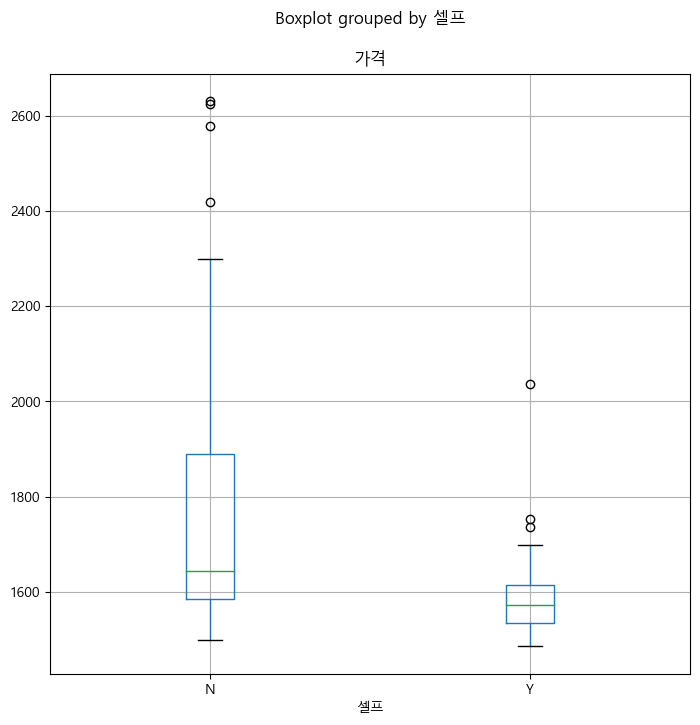

In [31]:
df.boxplot(column='가격', by='셀프', figsize=(8,8))
plt.show()

In [32]:
df[df['셀프']=='N'].가격.mean()

1745.6631578947367

In [33]:
df[df['셀프']=='Y'].가격.mean()

1581.695652173913

In [34]:
df[df['셀프']=='N'].shape, df[df['셀프']=='Y'].shape

((190, 6), (253, 6))

# 독립표본 T 검정
* 2-sample T 검정 (독립표본 T 검정)
* P-value 가 0.05보다 작으면 귀무가설을 기각, 대립가설을 채택

    - 귀무가설(H0): 셀프 주유소와 일반 주유소의 가격 차이가 없다.
    - 대립가설(H1): 셀프 주유소와 일반 주유소의 가격 차이가 있다.

In [35]:
import scipy as sp
sp.stats.ttest_ind(df[df['셀프']=='Y'].가격, df[df['셀프']=='N'].가격, equal_var=False)

# p-value<0.05 이므로 셀프 주유소와 일반 주유소의 가격 차이가 있다고 할 수 있다.

Ttest_indResult(statistic=-9.317055202934798, pvalue=1.8481913825391274e-17)

## 상표별 셀프와 일반 주유소의 가격 차이

In [36]:
df.상표.unique()

array(['현대오일뱅크', 'GS칼텍스', 'SK에너지', 'S-OIL', '알뜰(ex)', '자가상표', '알뜰주유소'],
      dtype=object)

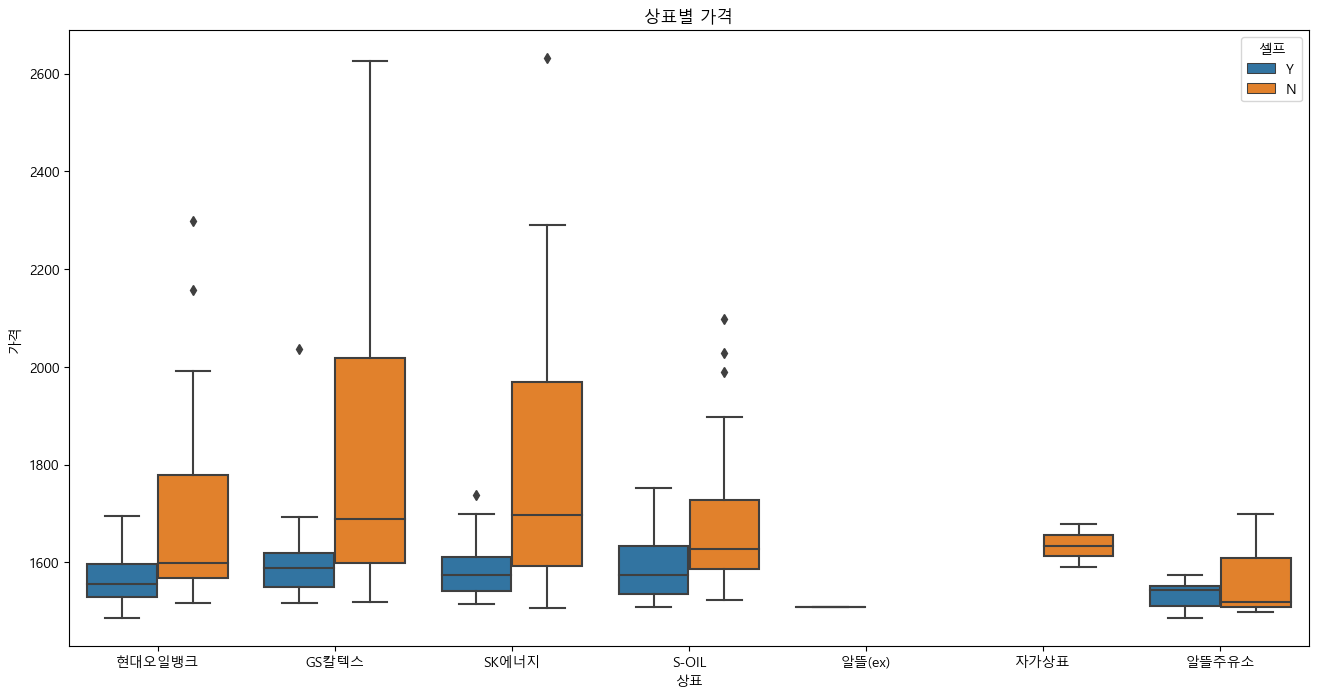

In [37]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df,x='상표', y='가격', hue='셀프')
plt.title('상표별 가격')
plt.show()

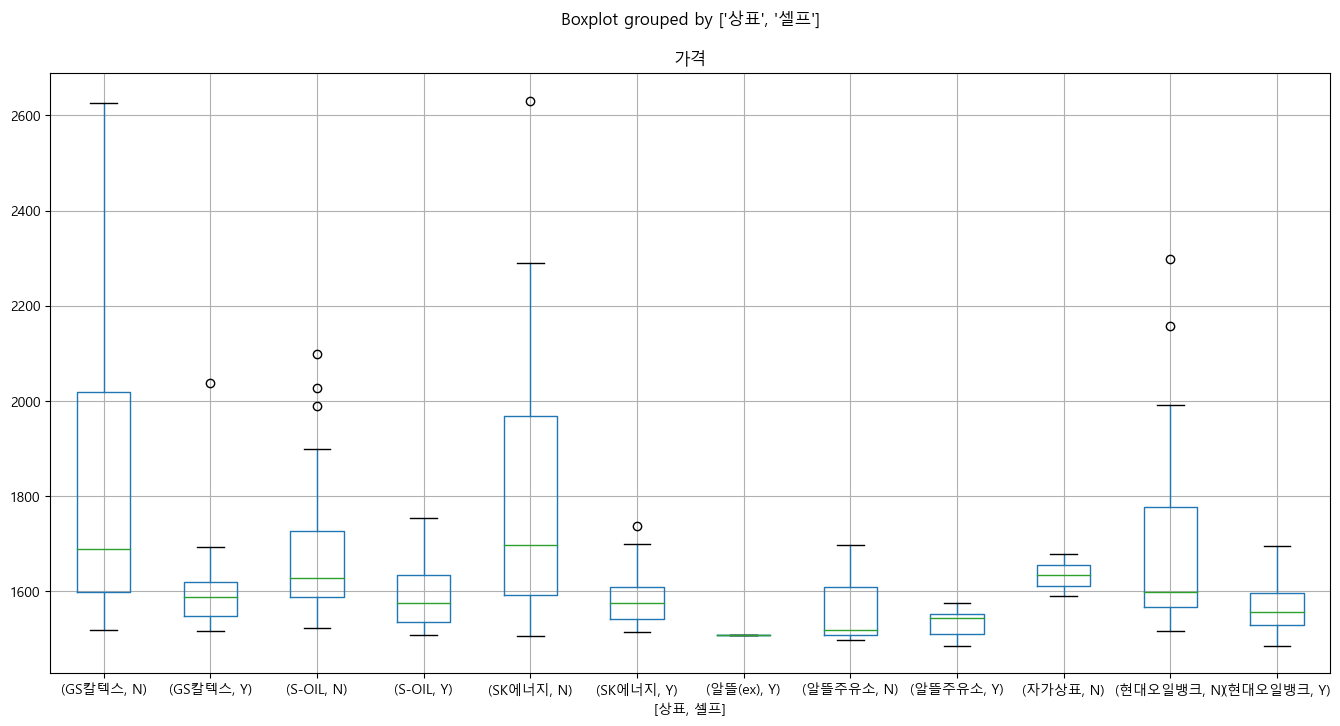

In [38]:
df.boxplot(column='가격', by=['상표','셀프'], figsize=(16,8))
plt.show()

In [39]:
import json, folium

In [40]:
# 가격이 싼 주유소 TOP 5
df.sort_values(by='가격').head(5)

,상호,주소,가격,셀프,상표,구
0,화곡역주유소,서울 강서구 강서로 154 (화곡동),1485,Y,알뜰주유소,강서구
1,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1485,Y,현대오일뱅크,강서구
2,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1498,N,알뜰주유소,강서구
0,성산대교셀프주유소,서울 마포구 성산로 144,1507,Y,현대오일뱅크,마포구
1,청원주유소,서울 마포구 월드컵북로 113 (성산동),1507,Y,현대오일뱅크,마포구


In [41]:
# 가격이 비싼 주유소 TOP 5
df.sort_values(by='가격', ascending=False).head(5)

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2631,N,SK에너지,중구
11,서계주유소,서울 용산구 청파로 367 (청파동),2625,N,GS칼텍스,용산구
32,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스,강남구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2419,N,GS칼텍스,중구
31,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2298,N,현대오일뱅크,강남구


In [42]:
# 구별 비교 평균이 제일 큰 순으로
pd.pivot_table(df, values='가격', index='구', aggfunc=['mean','min','max'])
# .sort_values(by='mean', ascending=False)

,mean,min,max
,가격,가격,가격
구,,,
강남구,1874.575758,1605,2578
강동구,1683.428571,1569,2028
강북구,1535.250000,1525,1575
강서구,1592.303030,1485,1928
관악구,1629.500000,1575,1757
광진구,1579.384615,1524,1738
구로구,1639.800000,1525,2198
금천구,1594.272727,1535,1634


In [43]:
df.groupby('구')['가격'].agg(['mean','min','max']).sort_values(by='mean', ascending=False)

,mean,min,max
구,,,
용산구,2084.750000,1778,2625
중구,1975.200000,1609,2631
강남구,1874.575758,1605,2578
종로구,1853.750000,1569,2220
성동구,1718.250000,1524,2098
강동구,1683.428571,1569,2028
서초구,1669.966667,1509,1989
구로구,1639.800000,1525,2198
영등포구,1634.925926,1517,2199


# 각 구별 가장 싼 곳과 가장 비싼 곳 지도에 표시하기

In [68]:
# 컬럼이 최대값인지 최소값인지 판단하는 컬럼 생성 (초기값 0)
df['minmax']=0
df.head()

,상호,주소,가격,셀프,상표,구,minmax
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구,0
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1584,N,현대오일뱅크,강동구,0
2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),1596,Y,GS칼텍스,강동구,0
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1616,N,GS칼텍스,강동구,0
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1635,Y,GS칼텍스,강동구,0


In [69]:
# 해당 구에서 최대값과 최소값만 구하기
gu_minmax=df.groupby('구')['가격'].agg(['mean','min','max']).sort_values(by='mean', ascending=False)
gu_minmax.head(3)

,mean,min,max
구,,,
용산구,2084.750000,1778,2625
중구,1975.200000,1609,2631
강남구,1874.575758,1605,2578


In [70]:
_, mi, mx=gu_minmax.loc['강남구']
mi, mx=int(mi), int(mx)
mi, mx

(1605, 2578)

In [85]:
# minmax 컬럼에 가격과 최소값(mi)이 같으면 1, 가격과 최대값(mx)이 같으면 2
for gu in gu_minmax.index:
    _, mi, mx=gu_minmax.loc[gu]
    mi, mx=int(mi), int(mx)
    for i in df.index:
        if df.가격[i]==mi and df.구[i]==gu:
            df.minmax[i]=1
        if df.가격[i]==mx and df.구[i]==gu:
            df.minmax[i]=2

C:\Users\songh\AppData\Local\Temp\ipykernel_18164\1589367354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.minmax[i]=1
C:\Users\songh\AppData\Local\Temp\ipykernel_18164\1589367354.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.minmax[i]=2


In [72]:
df1=df[df.minmax != 0]
df1.head(3)

,상호,주소,가격,셀프,상표,구,minmax
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구,1
13,광성주유소,서울 강동구 올림픽로 673 (천호동),2028,N,S-OIL,강동구,2
14,동서울고속주유소,서울 동대문구 한천로 414,1520,Y,SK에너지,동대문구,1


In [73]:
from urllib.parse import quote

In [74]:
with open ("kakaokey.txt") as file:
    kakao_key=file.read()

In [75]:
local_url='https://dapi.kakao.com/v2/local/search/address.json'
header={'Authorization': f'KakaoAK {kakao_key}'}

In [76]:
# 반복문을 통해서 모든 소방청의 위도, 경도 좌표 구하기
lng_list, lat_list=[], []
for i in df1.index:
    url_addr=f'{local_url}?query={quote(df1.주소[i])}'
    result=requests.get(url_addr, headers=header).json()
    try:
        lng_list.append(float(result['documents'][0]['x']))
        lat_list.append(float(result['documents'][0]['y']))
    except:
        print(df.상호[i])

In [79]:
df1['위도']=lat_list
df1['경도']=lng_list
df1.head()

C:\Users\songh\AppData\Local\Temp\ipykernel_18164\3100959672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['위도']=lat_list
C:\Users\songh\AppData\Local\Temp\ipykernel_18164\3100959672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['경도']=lng_list


,상호,주소,가격,셀프,상표,구,minmax,위도,경도
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구,1,37.536417,127.149372
13,광성주유소,서울 강동구 올림픽로 673 (천호동),2028,N,S-OIL,강동구,2,37.541577,127.124242
14,동서울고속주유소,서울 동대문구 한천로 414,1520,Y,SK에너지,동대문구,1,37.597544,127.068039
30,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),1790,N,현대오일뱅크,동대문구,2,37.588425,127.057395
31,지에스칼텍스(주) 대방주유소,서울 동작구 여의대방로 214,1555,N,GS칼텍스,동작구,1,37.505736,126.922881


In [80]:
import folium

In [81]:
filename='skorea_municipalities_geo_simple.json'
geo_str=json.load(open(filename, encoding='utf8'))

In [84]:
map=folium.Map(location=[37.5502, 126.982], zoom_start=12)
for i in df1.index:
    folium.Marker(
        location=[df1.위도[i], df1.경도[i]],
        tooltip=f'{df.상호[i]} <br>휘발유 : {df.가격[i]:,d}원',
        popup=folium.Popup(df.주소[i], max_width=200),
        icon=folium.Icon(color='green' if df1.minmax[i]==1 else 'red',
                        icon='glyphicon glyphicon-thumbs-up' if df1.minmax[i]==1 else 'glyphicon glyphicon-thumbs-down')
    ).add_to(map)
title='<h3 align="center" style="font-size:20px">서울소재 구별 가장 비싸거나 싼 주유소 위치</h3>'
map.get_root().html.add_child(folium.Element(title))
map